<a href="https://colab.research.google.com/github/dbl007/colab/blob/main/pytorch_getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

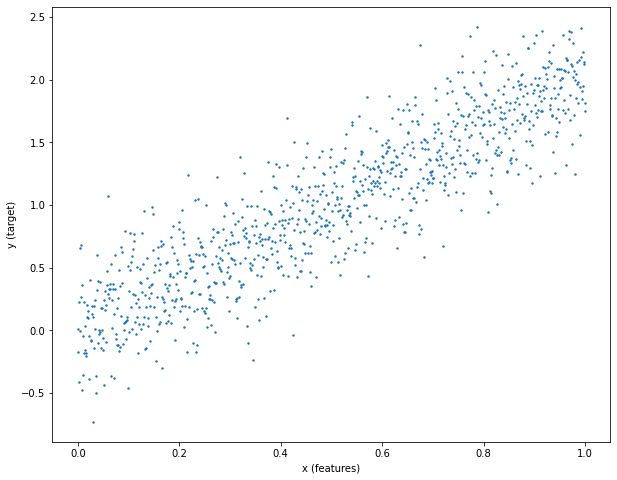

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

# create a noisy linear correlation

x = np.linspace(0, 1, 1000)
y = 2 * x + np.random.randn(1000) * 0.3

plt.figure(figsize=(10, 8))  # figsize(float, float), default: rcParams["figure.figsize"] (default: [6.4, 4.8]) Width, height in inches.
plt.scatter(x, y, s=2)
plt.xlabel('x (features)')
plt.ylabel('y (target)')
plt.show()

In [2]:
import torch

# Converts the input and target from numpy to tensors
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)


# Summary of the input and target tensors

print("Describing the features...")
print(type(x_tensor))
print(x_tensor.dtype)
print(x_tensor.shape)
print(x_tensor[:10])

print("\n\nDescribing the target...")
print(type(y_tensor))
print(y_tensor.dtype)
print(y_tensor.shape)
print(y_tensor[:10])

Describing the features...
<class 'torch.Tensor'>
torch.float64
torch.Size([1000])
tensor([0.0000, 0.0010, 0.0020, 0.0030, 0.0040, 0.0050, 0.0060, 0.0070, 0.0080,
        0.0090], dtype=torch.float64)


Describing the target...
<class 'torch.Tensor'>
torch.float64
torch.Size([1000])
tensor([ 0.0087, -0.1724, -0.4139,  0.2234,  0.6610, -0.0038,  0.2682,  0.6855,
         0.3606, -0.4778], dtype=torch.float64)


In [3]:
# defines the data type of the variable used for w
dtype = torch.float

# defines the device in which we would like to keep the tensor
device = torch.device("cpu")

# States that the weight is a torch tensor. 
# This will allow us to calculate the gradient associated with this variable
# and optimize it using the high level torch modules.
w_tensor = torch.tensor(0.1, device=device, dtype=dtype, requires_grad=True)

# Summary of the weight tensor
print("\n\nDescribing the weights...")
print(type(w_tensor))
print(w_tensor.dtype)
print(w_tensor.shape)
print(w_tensor)



Describing the weights...
<class 'torch.Tensor'>
torch.float32
torch.Size([])
tensor(0.1000, requires_grad=True)


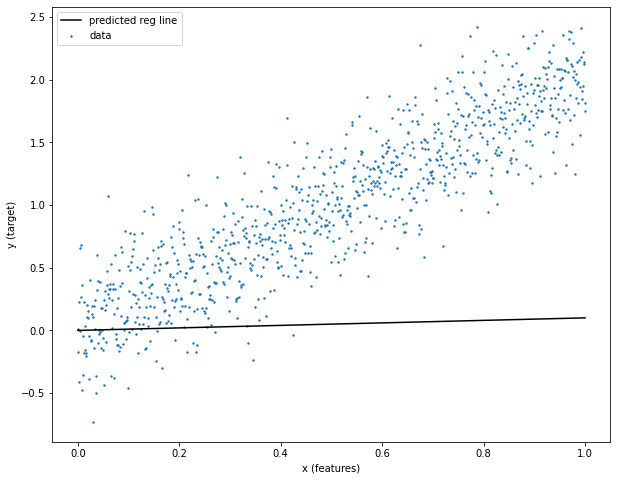

In [4]:
# defines the figure to plot
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlabel('x (features)')
plt.ylabel('y (target)')

# plot the original data
line1 = ax.scatter(x, y, s=2)

# estimates the predicted Y and plots a new line
reg_x = np.linspace(0,1,100)
reg_yhat = np.linspace(0,1,100) * w_tensor.detach().numpy()
line2, = ax.plot(reg_x, reg_yhat, 'black')

# display legend
plt.gca().legend(['predicted reg line', 'data'])

plt.show()

In [5]:
# defines the MSE loss
loss_func = torch.nn.MSELoss(reduction='sum')

print("Summary of loss function...")
display.display(loss_func)


# defines the SGD optimizer
learning_rate = 1e-4
optimizer = torch.optim.SGD([w_tensor], lr=learning_rate)

print("\n\nSummary of optimizer...")
display.display(optimizer)

print("\n\n List of parameters to optimize...")
display.display(optimizer.param_groups)

Summary of loss function...


MSELoss()



Summary of optimizer...


SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0
    nesterov: False
    weight_decay: 0
)



 List of parameters to optimize...


[{'dampening': 0,
  'lr': 0.0001,
  'momentum': 0,
  'nesterov': False,
  'params': [tensor(0.1000, requires_grad=True)],
  'weight_decay': 0}]

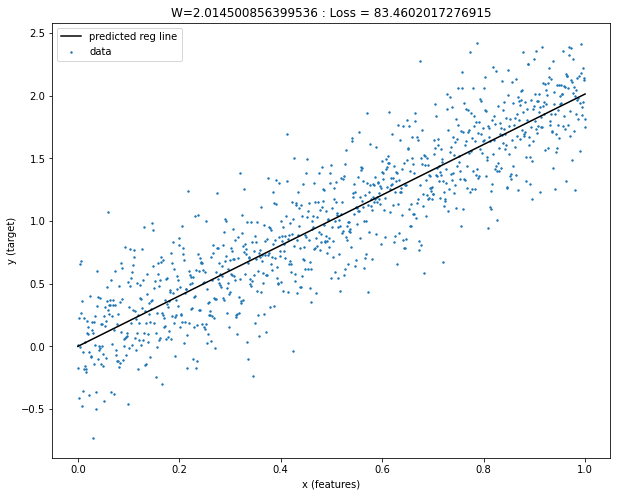

In [6]:
# optimization loop
for e in range(100):

  # predicts y given the input x vector and the estimated weight
  yhat_tensor = x_tensor * w_tensor

  # calculates the mse between the real y vector and the predicted one
  loss = loss_func(yhat_tensor, y_tensor)
  
  # plots the current fit
  if e % 1 == 0: 
    line2.set_ydata(np.linspace(0,1,100) * w_tensor.detach().numpy())
    ax.set_title(f'W={w_tensor.detach().numpy()} : Loss = {loss.item()}')
  
    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(0.1)
  
  # default steps to optimize the weights through backpropagation
  # unless you know what you are doing I would recommend to keep this as is
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

## NN Module

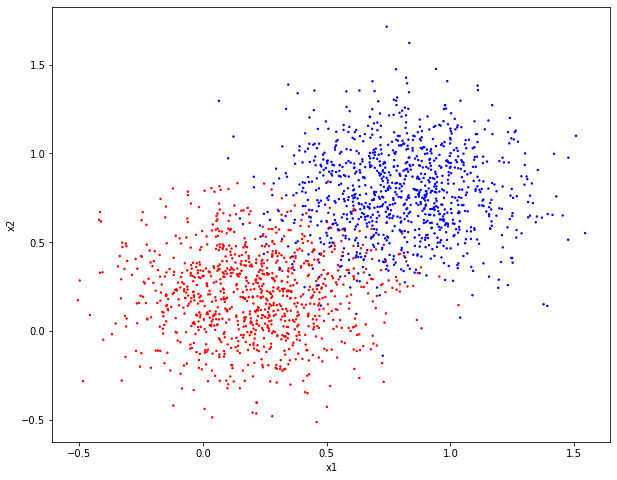

In [7]:
# create a two class classification problem

r = 0.25

# defines the first cluster x and y points
x1_1 = r*np.random.randn(1000)+0.2
x1_2 = r*np.random.randn(1000)+0.2

# defines the second cluster x and y points
x2_1 = r*np.random.randn(1000)+0.8
x2_2 = r*np.random.randn(1000)+0.8

# concatenates the two clusters to create our input features
x = np.vstack([np.append(x1_1, x2_1), np.append(x1_2, x2_2)]).T.astype('float32')

# defines the first cluster as class 0 and the second as class 1
y = np.hstack([np.zeros(1000,),np.ones(1000,)]).astype('int')
              
# plots the two clusters
cmap = np.array(['r', 'b'])
plt.figure(figsize=(10, 8))
plt.scatter(x[:,0], x[:,1], s=2, c=cmap[(y > 0.5).astype(int)])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [8]:
# model definition through torch Sequential. 
# This statement defines a neural network with 5 layers.
# For the first layer you need to define the shape of your input features,
# while for the last layer (or second to last if the last is an activation layer)
# you need to match the layer size with the number of classes in your target variable.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 10), # there are 2 features in the x variable
    torch.nn.BatchNorm1d(10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2), # there are 2 classes in our dataset
    torch.nn.Softmax(dim=1),
)

# provides a summary of our custom network
model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=10, out_features=2, bias=True)
  (4): Softmax(dim=1)
)

In [9]:
# converts the numpy arrays into pytorch tensors
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

# defines the cross entropy loss
loss_func = torch.nn.CrossEntropyLoss()

print("Summary of loss function...")
display.display(loss_func)


# defines the rmsprop optimizer
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

print("\n\nSummary of optimizer...")
display.display(optimizer)

print("\n\n List of parameters to optimize...")
display.display(optimizer.param_groups)

Summary of loss function...


CrossEntropyLoss()



Summary of optimizer...


RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.001
    momentum: 0
    weight_decay: 0
)



 List of parameters to optimize...


[{'alpha': 0.99,
  'centered': False,
  'eps': 1e-08,
  'lr': 0.001,
  'momentum': 0,
  'params': [Parameter containing:
   tensor([[-0.2893,  0.6702],
           [ 0.4023, -0.0020],
           [-0.5451,  0.0183],
           [ 0.5299, -0.0040],
           [ 0.4793, -0.2562],
           [ 0.5577,  0.3304],
           [ 0.1025,  0.5988],
           [-0.2554, -0.4838],
           [ 0.2566, -0.2849],
           [ 0.4698, -0.7069]], requires_grad=True), Parameter containing:
   tensor([-0.4780,  0.2162,  0.2812, -0.2796,  0.4480,  0.4341,  0.3489, -0.0897,
            0.6625, -0.2428], requires_grad=True), Parameter containing:
   tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True), Parameter containing:
   tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True), Parameter containing:
   tensor([[ 0.0120,  0.0876, -0.2758, -0.2375,  0.0419, -0.1674,  0.1395, -0.0302,
             0.0766,  0.0603],
           [ 0.2357,  0.2792, -0.2199, -0.1434, -0.0148, -0.0744

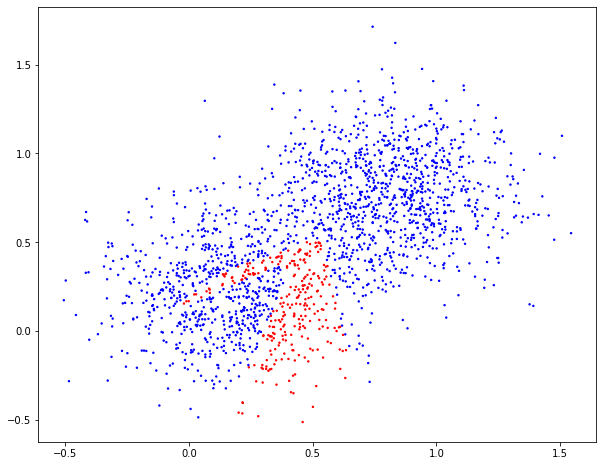

In [10]:
# Calculates the probability of belonging to each class
yhat = model(x_tensor)

# sets the color of each sample to red or blue 
# depending on the most probable class for that sample
cmap = np.array(['r', 'b'])
c = cmap[(yhat.argmax(axis=1).detach().numpy().flatten() > 0.5).astype(int)]

# plot the original data with the predicted colors
fig, ax = plt.subplots(figsize=(10, 8))
line1 = ax.scatter(x[:,0], x[:,1], s=2, c=c)

plt.show()

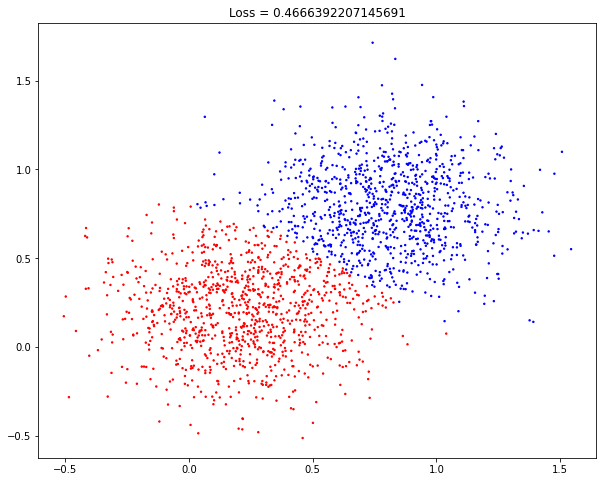

In [11]:
# optimization loop
for e in range(51):

  # predicts y given the input x vector and the estimated weight
  yhat_tensor = model(x_tensor)

  # calculates the mse between the real y vector and the predicted one
  loss = loss_func(yhat_tensor, y_tensor)
  
  # plots the current fit
  if e in list(range(5))+[10, 50]: 
    c = cmap[(yhat_tensor.argmax(axis=1).detach().numpy().flatten() > 0.5).astype(int)]
    line1.set_color(c)
    ax.set_title(f'Loss = {loss.item()}')
    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(0.1)
  
  # default steps to optimize the weights through backpropagation
  # unless you know what you are doing I would recommend to keep this as is
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()